# Fine-tune Inception V3, Resnet and Visualize

In [1]:
import os
import sys
import glob
import random
import numpy as np
import pandas as pd
import scipy.ndimage
from PIL import Image
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.models import Model

import numpy as np
% matplotlib inline


# Import modules every time you run code imported using %aimport
%load_ext autoreload
%autoreload 1

# Add the src directory for functions
src_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'src')
print(src_dir)
sys.path.append(src_dir)

# import my functions:
%aimport models
from models import*
%aimport functions
from functions import*

# Base Directory where data is stored
base_data_dir = '/home/rbbidart/project/rbbidart/breakHis/'
base_out_dir = '/home/rbbidart/breakHis_out'

Using TensorFlow backend.


/home/rbbidart/breakHis/src


## Load and Save models
* Compute nodes have no internet
* resnet50, inception resnet v2

In [5]:
# InceptionV3 = InceptionV3(weights='imagenet', include_top=False)
# InceptionV3.save('/Users/rb/Downloads/InceptionV3')

# ResNet50 = ResNet50(weights='imagenet', include_top=False)
# ResNet50.save('/Users/rb/Downloads/ResNet50')

## InceptionV3
* Add dense layer and train this
* Straight from keras tutorial

/home/rbbidart/tensorflow/lib/python3.5/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


num_train 1078
num_valid 243
steps_per_epoch 67.0
validation_steps 15.0
Found 1078 images belonging to 8 classes.
Found 243 images belonging to 8 classes.
Training the top layers only
Epoch 1/5
68/67 [==============================] - 145s 2s/step - loss: 1.7988 - acc: 0.3836 - val_loss: 1.3826 - val_acc: 0.6626
Epoch 2/5
68/67 [==============================] - 73s 1s/step - loss: 1.5854 - acc: 0.4497 - val_loss: 1.1700 - val_acc: 0.6626
Epoch 3/5
68/67 [==============================] - 75s 1s/step - loss: 1.4799 - acc: 0.4738 - val_loss: 1.1103 - val_acc: 0.6502
Epoch 4/5
68/67 [==============================] - 68s 1s/step - loss: 1.3767 - acc: 0.5021 - val_loss: 0.9869 - val_acc: 0.6872
Epoch 5/5
68/67 [==============================] - 72s 1s/step - loss: 1.3002 - acc: 0.5399 - val_loss: 0.9197 - val_acc: 0.7243
Make sure nothing is going terribly wrong with training last layers
Final 2 Epochs Avg Validation loss:  0.705761316934


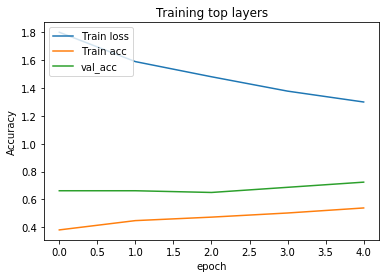

Fine tuning layers
Epoch 1/100
68/67 [==============================] - 92s 1s/step - loss: 1.2387 - acc: 0.5502 - val_loss: 0.9707 - val_acc: 0.7202
Epoch 2/100
68/67 [==============================] - 69s 1s/step - loss: 1.1484 - acc: 0.6035 - val_loss: 0.9735 - val_acc: 0.7284
Epoch 3/100
68/67 [==============================] - 75s 1s/step - loss: 1.1130 - acc: 0.6278 - val_loss: 0.9632 - val_acc: 0.7325
Epoch 4/100
68/67 [==============================] - 74s 1s/step - loss: 1.0874 - acc: 0.6374 - val_loss: 0.9411 - val_acc: 0.7449
Epoch 5/100
68/67 [==============================] - 81s 1s/step - loss: 1.0556 - acc: 0.6603 - val_loss: 0.9408 - val_acc: 0.7449
Epoch 6/100
68/67 [==============================] - 71s 1s/step - loss: 1.0524 - acc: 0.6572 - val_loss: 0.9389 - val_acc: 0.7490
Epoch 7/100
68/67 [==============================] - 81s 1s/step - loss: 1.0285 - acc: 0.6583 - val_loss: 0.9309 - val_acc: 0.7407
Epoch 8/100
68/67 [==============================] - 78s 1s/step

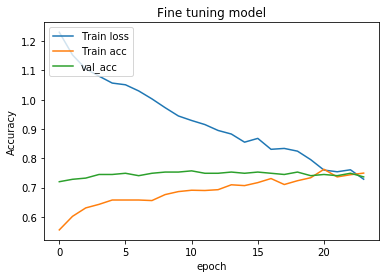

In [7]:
base_model = load_model('/home/rbbidart/project/rbbidart/InceptionV3')
data_loc = os.path.join(base_data_dir, 'mkfold_keras_8', 'fold1')
out_loc = os.path.join(base_out_dir, 'inception_pre_249')
num_out = 8
magnification = 100

ft_pre_model(base_model, data_loc, out_loc, magnification, num_out, epochs_first=5, 
                          img_dim=512, layer_train=249)

#### Fine-tuning more layers 
* Do 4 inception blocks instead of 2

/home/rbbidart/tensorflow/lib/python3.5/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


num_train 1078
num_valid 243
steps_per_epoch 67.0
validation_steps 15.0
Found 1078 images belonging to 8 classes.
Found 243 images belonging to 8 classes.
Training the top layers only
Epoch 1/10
68/67 [==============================] - 88s 1s/step - loss: 1.7879 - acc: 0.4044 - val_loss: 1.4403 - val_acc: 0.6543
Epoch 2/10
68/67 [==============================] - 71s 1s/step - loss: 1.5783 - acc: 0.4502 - val_loss: 1.1816 - val_acc: 0.6626
Epoch 3/10
68/67 [==============================] - 76s 1s/step - loss: 1.4778 - acc: 0.4683 - val_loss: 1.0753 - val_acc: 0.6626
Epoch 4/10
68/67 [==============================] - 75s 1s/step - loss: 1.3927 - acc: 0.5063 - val_loss: 1.1020 - val_acc: 0.7202
Epoch 5/10
68/67 [==============================] - 80s 1s/step - loss: 1.3240 - acc: 0.5147 - val_loss: 1.0069 - val_acc: 0.7037
Epoch 6/10
68/67 [==============================] - 76s 1s/step - loss: 1.2397 - acc: 0.5612 - val_loss: 1.0257 - val_acc: 0.6626
Epoch 7/10
68/67 [==================

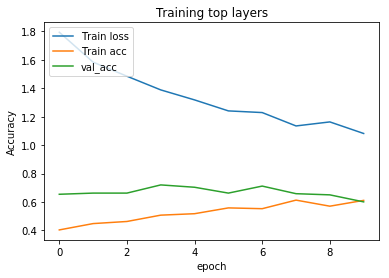

Fine tuning layers
Epoch 1/100
68/67 [==============================] - 105s 2s/step - loss: 1.0736 - acc: 0.6582 - val_loss: 0.9209 - val_acc: 0.7449
Epoch 2/100
68/67 [==============================] - 84s 1s/step - loss: 0.9392 - acc: 0.6753 - val_loss: 0.9094 - val_acc: 0.7531
Epoch 3/100
68/67 [==============================] - 85s 1s/step - loss: 0.8823 - acc: 0.7005 - val_loss: 0.9081 - val_acc: 0.7490
Epoch 4/100
68/67 [==============================] - 85s 1s/step - loss: 0.8628 - acc: 0.7033 - val_loss: 0.8933 - val_acc: 0.7407
Epoch 5/100
68/67 [==============================] - 85s 1s/step - loss: 0.8466 - acc: 0.7008 - val_loss: 0.8865 - val_acc: 0.7490
Epoch 6/100
68/67 [==============================] - 85s 1s/step - loss: 0.7785 - acc: 0.7408 - val_loss: 0.8851 - val_acc: 0.7490
Epoch 7/100
68/67 [==============================] - 77s 1s/step - loss: 0.7832 - acc: 0.7450 - val_loss: 0.8909 - val_acc: 0.7531
Epoch 8/100
68/67 [==============================] - 88s 1s/ste

Check fine-tuning
Final 5 Epochs Avg Validation loss:  0.765432098888


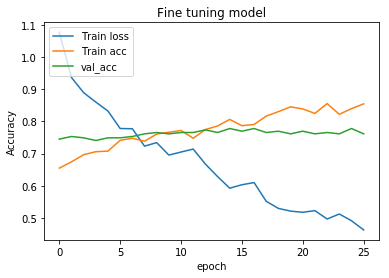

In [3]:
base_model = load_model('/home/rbbidart/project/rbbidart/InceptionV3')
data_loc = os.path.join(base_data_dir, 'mkfold_keras_8', 'fold1')
out_loc = os.path.join(base_out_dir, 'inception_pre_197')
num_out = 8
magnification = 100

ft_pre_model(base_model, data_loc, out_loc, magnification, num_out, epochs_first=10, 
                          img_dim=512, layer_train=197)

## Resnet
* Train the last two blocks of 16 total

/home/rbbidart/tensorflow/lib/python3.5/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


num_train 1078
num_valid 243
steps_per_epoch 67.0
validation_steps 15.0
Found 1078 images belonging to 8 classes.
Found 243 images belonging to 8 classes.
Training the top layers only
Epoch 1/10
68/67 [==============================] - 84s 1s/step - loss: 1.4638 - acc: 0.4907 - val_loss: 1.1755 - val_acc: 0.6955
Epoch 2/10
68/67 [==============================] - 68s 994ms/step - loss: 0.9609 - acc: 0.6618 - val_loss: 0.9065 - val_acc: 0.7613
Epoch 3/10
68/67 [==============================] - 71s 1s/step - loss: 0.7174 - acc: 0.7514 - val_loss: 0.9522 - val_acc: 0.7984
Epoch 4/10
68/67 [==============================] - 71s 1s/step - loss: 0.6505 - acc: 0.7672 - val_loss: 1.0332 - val_acc: 0.7037
Epoch 5/10
68/67 [==============================] - 71s 1s/step - loss: 0.5662 - acc: 0.8041 - val_loss: 1.0119 - val_acc: 0.7778
Epoch 6/10
68/67 [==============================] - 71s 1s/step - loss: 0.5451 - acc: 0.8184 - val_loss: 1.1640 - val_acc: 0.6667
Epoch 7/10
68/67 [===============

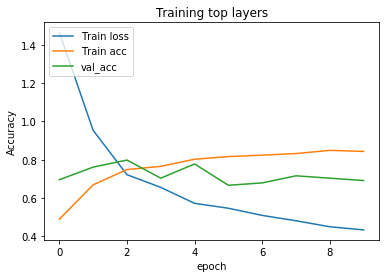

Fine tuning layers
Epoch 1/100
68/67 [==============================] - 93s 1s/step - loss: 0.3850 - acc: 0.8748 - val_loss: 1.1690 - val_acc: 0.6955
Epoch 2/100
68/67 [==============================] - 69s 1s/step - loss: 0.3609 - acc: 0.8890 - val_loss: 1.1540 - val_acc: 0.6914
Epoch 3/100
68/67 [==============================] - 72s 1s/step - loss: 0.3000 - acc: 0.9080 - val_loss: 1.1576 - val_acc: 0.6914
Epoch 4/100
68/67 [==============================] - 73s 1s/step - loss: 0.3427 - acc: 0.8896 - val_loss: 1.1789 - val_acc: 0.6872
Epoch 5/100
68/67 [==============================] - 73s 1s/step - loss: 0.3211 - acc: 0.9083 - val_loss: 1.1668 - val_acc: 0.6831
Epoch 6/100
68/67 [==============================] - 73s 1s/step - loss: 0.3083 - acc: 0.9080 - val_loss: 1.1732 - val_acc: 0.6831
Epoch 7/100
68/67 [==============================] - 73s 1s/step - loss: 0.3129 - acc: 0.9006 - val_loss: 1.1687 - val_acc: 0.6872
Check fine-tuning
Final 5 Epochs Avg Validation loss:  0.6864197

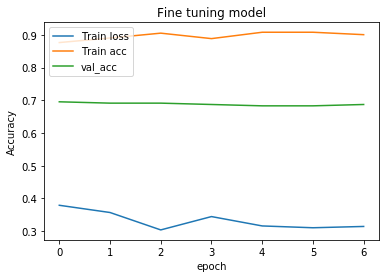

In [9]:
base_model = load_model('/home/rbbidart/project/rbbidart/ResNet50')
data_loc = os.path.join(base_data_dir, 'mkfold_keras_8', 'fold1')
out_loc = os.path.join(base_out_dir, 'ResNet50_pre_152')
num_out = 8
magnification = 100

ft_pre_model(base_model, data_loc, out_loc, magnification, num_out, epochs_first=10, 
                          img_dim=512, layer_train=152)

#### Fine-tuning more layers 
* Train the last 6 blocks of 16 total

/home/rbbidart/tensorflow/lib/python3.5/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


num_train 1078
num_valid 243
steps_per_epoch 67.0
validation_steps 15.0
Found 1078 images belonging to 8 classes.
Found 243 images belonging to 8 classes.
Training the top layers only
Epoch 1/10
68/67 [==============================] - 88s 1s/step - loss: 1.4436 - acc: 0.4802 - val_loss: 1.5157 - val_acc: 0.3704
Epoch 2/10
68/67 [==============================] - 71s 1s/step - loss: 0.9723 - acc: 0.6554 - val_loss: 1.2065 - val_acc: 0.5967
Epoch 3/10
68/67 [==============================] - 74s 1s/step - loss: 0.7697 - acc: 0.7385 - val_loss: 1.1199 - val_acc: 0.6667
Epoch 4/10
68/67 [==============================] - 74s 1s/step - loss: 0.6885 - acc: 0.7561 - val_loss: 0.9760 - val_acc: 0.7449
Epoch 5/10
68/67 [==============================] - 74s 1s/step - loss: 0.6021 - acc: 0.7902 - val_loss: 1.0676 - val_acc: 0.7284
Epoch 6/10
68/67 [==============================] - 74s 1s/step - loss: 0.5286 - acc: 0.8260 - val_loss: 1.1234 - val_acc: 0.6790
Epoch 7/10
68/67 [==================

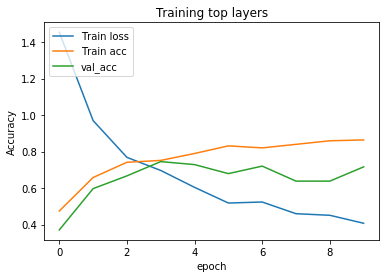

Fine tuning layers
Epoch 1/100
68/67 [==============================] - 102s 1s/step - loss: 0.3320 - acc: 0.8876 - val_loss: 1.1528 - val_acc: 0.6872
Epoch 2/100
68/67 [==============================] - 77s 1s/step - loss: 0.2934 - acc: 0.9083 - val_loss: 1.1297 - val_acc: 0.6872
Epoch 3/100
68/67 [==============================] - 82s 1s/step - loss: 0.2885 - acc: 0.9158 - val_loss: 1.1188 - val_acc: 0.6996
Epoch 4/100
68/67 [==============================] - 80s 1s/step - loss: 0.3041 - acc: 0.9003 - val_loss: 1.1298 - val_acc: 0.6914
Epoch 5/100
68/67 [==============================] - 87s 1s/step - loss: 0.2803 - acc: 0.9146 - val_loss: 1.1315 - val_acc: 0.6996
Epoch 6/100
68/67 [==============================] - 77s 1s/step - loss: 0.2802 - acc: 0.9123 - val_loss: 1.1244 - val_acc: 0.6955
Epoch 7/100
68/67 [==============================] - 81s 1s/step - loss: 0.2696 - acc: 0.9084 - val_loss: 1.1491 - val_acc: 0.6914
Epoch 8/100
68/67 [==============================] - 81s 1s/ste

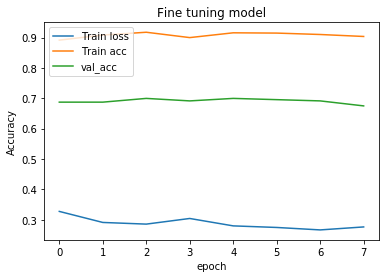

In [5]:
base_model = load_model('/home/rbbidart/project/rbbidart/ResNet50')
data_loc = os.path.join(base_data_dir, 'mkfold_keras_8', 'fold1')
out_loc = os.path.join(base_out_dir, 'ResNet50_pre_110')
num_out = 8
magnification = 100

ft_pre_model(base_model, data_loc, out_loc, magnification, num_out, epochs_first=10, 
                          img_dim=512, layer_train=110)

# Visualize

conv_outputs.shape (14, 14, 2048)
class_weights.shape (2048, 8)
cam.shape (14, 14, 8)
np.mean(cam) -4.78327e-06
np.mean(img) 207.639719645


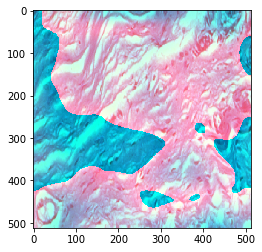

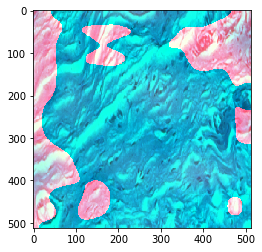

In [70]:
model_loc = os.path.join(base_out_dir, 'inception_pre_249', 'fine_tune_.19-0.75.hdf5')
# model = load_model(model_loc)

# img_loc = '/home/rbbidart/project/rbbidart/breakHis/mkfold_keras_8/fold1/100/valid/B_F/SOB_B_F-14-14134-100-001.png'
img_loc = '/home/rbbidart/project/rbbidart/breakHis/mkfold_keras_8/fold1/100/valid/B_F/SOB_B_F-14-14134-100-021.png'

visualize_incp(model, img_loc)